# **Import Libraries and modules**

#**Fourth DNN**
1) Changing the chanel values.

2)changing epocs.

3)Changing learning rate.



In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


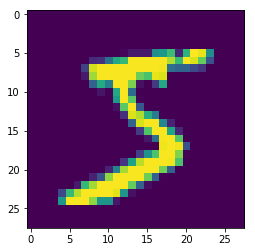

In [41]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [44]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [46]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

In [64]:
from keras.layers import Activation
model = Sequential()

 

#Layer 1

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.15))

model.add(Convolution2D(16,3,3, activation= 'relu'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.15))

model.add(Convolution2D(32,3,3, activation= 'relu'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization(axis=3))
#model.add(Dropout(0.1))

#Layer 2

model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization(axis=3))
#model.add(Dropout(0.1))

#Layer 3

model.add(Convolution2D(16,3,3, activation= 'relu'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Convolution2D(10,1,1))
#model.add(BatchNormalization(axis=3))
#model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` 

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_36 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [66]:
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 208us/step - loss: 0.3432 - acc: 0.9041 - val_loss: 0.0611 - val_acc: 0.9806
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 115us/step - loss: 0.0866 - acc: 0.9745 - val_loss: 0.0472 - val_acc: 0.9853
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 115us/step - loss: 0.0673 - acc: 0.9799 - val_loss: 0.0524 - val_acc: 0.9836
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 115us/step - loss: 0.0549 - acc: 0.9831 - val_loss: 0.0392 - val_acc: 0.9882
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [68]:
print(score)

[0.02085022953474254, 0.9943]


In [0]:
y_pred = model.predict(X_test)

In [70]:
print(y_pred[:9])
print(y_test[:9])

[[1.05546405e-07 3.70529079e-07 6.13529210e-06 3.63179674e-06
  1.87590558e-06 4.35777743e-08 7.05120851e-09 9.99985218e-01
  6.67944349e-08 2.53131225e-06]
 [1.87873484e-05 4.77896392e-05 9.99921083e-01 1.54528578e-07
  4.92602794e-06 2.78968432e-10 2.31227750e-06 4.55081545e-06
  2.31407654e-07 1.05959792e-07]
 [1.13735055e-07 9.99996185e-01 7.81124712e-08 8.44225170e-08
  3.08557730e-07 6.26020480e-08 1.96957458e-07 2.66469578e-06
  7.21179063e-08 3.18373964e-07]
 [9.99900818e-01 1.02364034e-07 1.35292026e-07 1.26508723e-07
  2.29282819e-06 9.63306306e-08 8.95313351e-05 3.75319416e-07
  4.06361778e-06 2.54978772e-06]
 [4.88251537e-08 1.91311585e-07 1.44308716e-08 8.17420620e-09
  9.99980807e-01 1.09204112e-08 1.55344071e-06 4.97445711e-08
  3.53798924e-07 1.71073589e-05]
 [1.04991791e-07 9.99996185e-01 5.43425287e-08 1.30391724e-08
  1.20465558e-07 3.30008398e-09 2.46540690e-08 3.17989657e-06
  4.19656701e-08 1.39707439e-07]
 [5.98718302e-08 1.92075299e-06 9.02169504e-08 1.12403598e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored